# Underwater analysis of complete pipeline

In [42]:
import numpy as np
import statistics

def read_final_results(path):
    correct_identify = []
    false_positives = []
    obstacle_count = []
    correct_obstacle_count = []
    shifted = []
    disparity_bad = []
    candidate_bad = []
    split_bad = []
    filter_bad = []
    rectify_fix_better = []
    time_preprocess = []
    time_disparity = []
    time_candidate = []
    time_splitting = []
    time_filter = []
    time_identify = []
    time_gap_fix = []
    time_total = []
    rectify_fix = []
    gap_fill = []
    correct_gap_fill = []

    with open(path,mode = 'r') as file:
        csvFile = csv.reader(file)
        line_number = 0
        for lines in csvFile:
            if line_number != 0:
                correct_identify.append(float(lines[1]))
                false_positives.append(float(lines[2]))
                obstacle_count.append(float(lines[3]))
                correct_obstacle_count.append(float(lines[4]))
                shifted.append(float(lines[5]))
                disparity_bad.append(float(lines[6]))
                candidate_bad.append(float(lines[7]))
                split_bad.append(float(lines[8]))
                filter_bad.append(float(lines[9]))
                rectify_fix_better.append(float(lines[10]))
                time_preprocess.append(float(lines[11]))
                time_disparity.append(float(lines[12]))
                time_candidate.append(float(lines[13]))
                time_splitting.append(float(lines[14]))
                time_filter.append(float(lines[15]))
                time_identify.append(float(lines[16]))
                time_gap_fix.append(float(lines[17]))
                time_total.append(float(lines[18]))
                rectify_fix.append(float(lines[19]))
                gap_fill.append(float(lines[20]))
                correct_gap_fill.append(float(lines[21]))
            else:
                line_number = line_number+1
                    

    return correct_identify,false_positives,obstacle_count,correct_obstacle_count,shifted,disparity_bad,candidate_bad,split_bad,filter_bad,rectify_fix_better,time_preprocess,time_disparity,time_candidate,time_splitting,time_filter,time_identify,time_gap_fix,time_total,rectify_fix,gap_fill,correct_gap_fill

def get_all_percentage_failures(disparity_bad,candidate_bad,split_bad,filter_bad,tested_frames):
    total_frames = tested_frames
    total_usable_frames = len(disparity_bad)
    total_good_disparity = 0
    total_good_candidate = 0
    total_good_split = 0
    total_good_filter = 0
    
    for i in range(len(disparity_bad)):
        if(disparity_bad[i] == 0):
            total_good_disparity = total_good_disparity+1
            if(candidate_bad[i] == 0):
                total_good_candidate = total_good_candidate+1
                if(split_bad[i] == 0):
                    total_good_split = total_good_split+1
                    if(filter_bad[i] == 0 or filter_bad[i] == -1):
                        total_good_filter = total_good_filter+1

    good_frame_percentage = 0.0
    good_disparity_percentage = 0.0
    good_candidate_percentage = 0.0
    good_split_percentage = 0.0
    good_filter_percentage = 0.0
    good_total_percentage = 0.0
    
    if(total_frames > 0):
        good_frame_percentage = total_usable_frames / total_frames*100.0
    if(total_usable_frames > 0):
        good_disparity_percentage = total_good_disparity / total_usable_frames*100.0
    if(total_good_disparity > 0):
        good_candidate_percentage = total_good_candidate / total_good_disparity*100.0
    if(total_good_candidate > 0):
        good_split_percentage = total_good_split / total_good_candidate*100.0
    if(total_good_split > 0):
        good_filter_percentage = total_good_filter / total_good_split*100.0
        good_total_percentage = total_good_filter / total_frames*100.0
        
        

    names = ["Valid frames", "Good disparity frames", "Good candidate frames", "Good split frames","Good filter frames","Good in total"]
    percentages = [good_frame_percentage,good_disparity_percentage,good_candidate_percentage,good_split_percentage,good_filter_percentage, good_total_percentage]
    frames = [total_usable_frames,total_good_disparity,total_good_candidate,total_good_split,total_good_filter,total_good_split]
    frame_comp = [total_frames,total_usable_frames,total_good_disparity,total_good_candidate,total_good_split,total_frames]
    
    return percentages,frames,names,frame_comp

def show_percentage_failures(percentages,frames,names,frame_comp):
    for i in range(len(percentages)):
        print(names[i]+": "+str(percentages[i])+"% -> "+str(frames[i]) +" of "+str(frame_comp[i]))
    return

def get_identification_results(correct_identify,false_positives,filter_bad,obstacle_count):

    total_obstacles = 0
    total_correct_identify = 0
    total_false_positive = 0
    
    total_good_obstacles = 0
    total_good_identify = 0
    total_good_false = 0
    
    for i in range(len(obstacle_count)):
        total_obstacles = total_obstacles+obstacle_count[i]
        total_correct_identify = total_correct_identify + correct_identify[i]
        total_false_positive = total_false_positive + false_positives[i]

        if(filter_bad[i] == 0):
            total_good_obstacles = total_good_obstacles+obstacle_count[i]
            total_good_identify = total_good_identify + correct_identify[i]
            total_good_false = total_good_false + false_positives[i]

    identify_percentage = 0.0
    false_percentage = 0.0

    good_identify_percentage = 0.0
    good_false_percentage = 0.0

    if(total_obstacles > 0):
        identify_percentage = total_correct_identify / total_obstacles *100.0
        false_percentage = total_false_positive / total_obstacles * 100.0

    if(total_good_obstacles > 0):
        good_identify_percentage = total_good_identify / total_good_obstacles *100.0
        good_false_percentage = total_good_false / total_good_obstacles * 100.0

    percentages = [identify_percentage, good_identify_percentage, false_percentage, good_false_percentage]
    names = ["Total identified", "Valid identified", "Total false positive", "Valid false positives"]
    comp_count = [total_obstacles, total_good_obstacles, total_obstacles, total_good_obstacles]
    count = [total_correct_identify,total_good_identify,total_false_positive,total_good_false]
    
    return percentages, names, comp_count, count

def show_percentage_idenitfication(percentages,names,comp_count,count):
    for i in range(len(percentages)):
        print(names[i]+": "+str(percentages[i])+"% -> "+str(count[i]) +" of "+str(comp_count[i]))
    return


def get_obstacle_results(obstacle_count,correct_obstacle_count,candidate_bad):

    total_obstacles = 0
    total_error_obstacles = 0
    total_correct_obstacles = 0
    error_diff = []

    total_valid_obstacles = 0
    total_valid_error_obstacles = 0
    total_valid_correct_obstacles = 0
    error_valid_diff = []

    valid_frames = 0

    over_cutting = 0
    under_cutting = 0

    valid_over_cutting = 0
    valid_under_cutting = 0
    
    
    for i in range(len(obstacle_count)):
        total_obstacles = total_obstacles+obstacle_count[i]
        total_correct_obstacles = total_correct_obstacles + correct_obstacle_count[i]
        error_diff.append(correct_obstacle_count[i]-obstacle_count[i])

        if(abs(correct_obstacle_count[i]-obstacle_count[i]) == 0):
            total_error_obstacles = total_error_obstacles + 1

        if(correct_obstacle_count[i]-obstacle_count[i]>0):
            under_cutting = under_cutting+1
        if(correct_obstacle_count[i]-obstacle_count[i]<0):
            over_cutting = over_cutting+1
        
    
        if(candidate_bad[i] == 0):
            valid_frames = valid_frames +1
            total_valid_obstacles = total_valid_obstacles+obstacle_count[i]
            total_valid_correct_obstacles = total_valid_correct_obstacles + correct_obstacle_count[i]
            error_valid_diff.append(correct_obstacle_count[i]-obstacle_count[i])
            if(abs(correct_obstacle_count[i]-obstacle_count[i]) == 0):
                total_valid_error_obstacles = total_valid_error_obstacles + 1
            
            if(correct_obstacle_count[i]-obstacle_count[i]>0):
                valid_under_cutting = valid_under_cutting+1
            if(correct_obstacle_count[i]-obstacle_count[i]<0):
                valid_over_cutting = valid_over_cutting+1
        

    obstacle_percentage = 0.0
    correct_count_percentage = 0.0

    valid_obstacle_percentage = 0.0
    valid_correct_count_percentage = 0.0

    over_cut_percentage = 0.0
    under_cut_percentage = 0.0
    valid_over_cut_percentage = 0.0
    valid_under_cut_percentage = 0.0

    if(total_correct_obstacles > 0):
        obstacle_percentage = total_obstacles / total_correct_obstacles * 100.0

    if(len(obstacle_count) > 0):
        correct_count_percentage = total_error_obstacles / len(obstacle_count)  * 100.0

    if(total_valid_correct_obstacles > 0):
        valid_obstacle_percentage = total_valid_obstacles / total_valid_correct_obstacles * 100.0

    if(valid_frames > 0):
        valid_correct_count_percentage = total_valid_error_obstacles / valid_frames * 100.0


    if(len(obstacle_count) > 0):
        over_cut_percentage = over_cutting / len(obstacle_count) * 100.0
        under_cut_percentage = under_cutting / len(obstacle_count) * 100.0

    if(valid_frames > 0):
        valid_over_cut_percentage = valid_over_cutting / valid_frames * 100.0
        valid_under_cut_percentage = valid_under_cutting / valid_frames * 100.0


    
    percentages = [obstacle_percentage, correct_count_percentage, valid_obstacle_percentage, valid_correct_count_percentage,over_cut_percentage,under_cut_percentage,valid_over_cut_percentage,valid_under_cut_percentage]
    names = ["Obstacles found", "Frames with correct amount of obstacles", "Obstacles found in valid frames", "Valid frames with correct amount of obstacles", "Overcut", "Undercut", "Valid overcut", "Valid undercut"]
    comp_count = [total_correct_obstacles,len(obstacle_count),total_valid_correct_obstacles,valid_frames,len(obstacle_count),len(obstacle_count),valid_frames,valid_frames]
    count = [total_obstacles,total_error_obstacles,total_valid_obstacles,total_valid_error_obstacles,over_cutting,under_cutting,valid_over_cutting,valid_under_cutting]
    
    return percentages, names, comp_count, count, error_diff, error_valid_diff

def show_percentage_obstacles(percentages,names,comp_count,count):
    for i in range(len(percentages)):
        print(names[i]+": "+str(percentages[i])+"% -> "+str(count[i]) +" of "+str(comp_count[i]))
    return

def get_rectify_gap_shift_results(rectify_fix, gap_fill, correct_gap_fill, rectify_fix_better, shifted,filter_bad, obstacle_count):

    shifted_count = 0
    valid_shifted_count = 0
    valid_frames = 0
    total_obstacles = 0
    valid_obstacles = 0

    rectification_fix_count = 0
    fix_better_count = 0

    gap_fill_count = 0
    gap_fill_success_count = 0

    valid_gap_fill_count = 0
    valid_gap_fill_success_count = 0

    for i in range(len(rectify_fix)):
        shifted_count = shifted_count + shifted[i]
        total_obstacles = total_obstacles + obstacle_count[i]

        if(filter_bad[i] == 0):
            valid_obstacles = valid_obstacles + obstacle_count[i]
            valid_frames = valid_frames +1
            valid_shifted_count = valid_shifted_count + shifted[i]

        if(rectify_fix[i] == 1):
            rectification_fix_count = rectification_fix_count +1;
            fix_better_count = fix_better_count + rectify_fix_better[i]

        if(gap_fill[i] == 1):
            gap_fill_count = gap_fill_count+1
            gap_fill_success_count = gap_fill_success_count + correct_gap_fill[i]
            if(filter_bad[i] == 0):
                valid_gap_fill_count = valid_gap_fill_count+1
                valid_gap_fill_success_count = valid_gap_fill_success_count +  correct_gap_fill[i]
                

    percentage_shifted = 0.0
    percentage_valid_shifted = 0.0

    percentage_good_rectify = 0.0

    percentage_good_gap_fill = 0.0

    valid_percentage_good_gap_fill = 0.0
    

    if(total_obstacles > 0):
        percentage_shifted = shifted_count / total_obstacles * 100.0
    if(valid_obstacles > 0):
        percentage_valid_shifted = valid_shifted_count / valid_obstacles * 100.0
    if(rectification_fix_count > 0):
        percentage_good_rectify = fix_better_count / rectification_fix_count * 100.0
    if(gap_fill_count > 0):
        percentage_good_gap_fill = gap_fill_success_count / gap_fill_count * 100.0

    if(valid_gap_fill_count > 0):
        valid_percentage_good_gap_fill = valid_gap_fill_success_count / valid_gap_fill_count * 100.0

    
    percentages = [percentage_shifted, percentage_valid_shifted, percentage_good_rectify, percentage_good_gap_fill,valid_percentage_good_gap_fill]
    names = ["Shifted obstacles", "Shifted valid obstacles", "Good rectify fix", "Good gap fill", "Valid good gap fill"]
    comp_count = [total_obstacles ,valid_obstacles,rectification_fix_count,gap_fill_count,valid_gap_fill_count]
    count = [shifted_count,valid_shifted_count,fix_better_count,gap_fill_success_count,valid_gap_fill_success_count]
    
    return percentages, names, comp_count, count, error_diff, error_valid_diff

def show_double_grouped_boxplots(upper_group,settings, input_data, colors, setting_name, y_label,title,save = False,save_title=""):
    groups = []
    plt.rcParams.update({'font.size': 25})
    plt.rcParams["figure.figsize"] = (12,6)
    lw = 3
    for i in range(len(upper_group)):
        dictionary = {}
        for j in range(len(settings)):
            print(settings[j])
            #print("Median: " statistics.median(input_data[i][j]))
            print("Quantiles: ")
            print(np.quantile(input_data[i][j],[0.25,0.5,0.75]))
            print("")
            
            dictionary.update({settings[j]:input_data[i][j]})
        temp_dataframe = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in dictionary.items() ]))
        groups.append(temp_dataframe)

    x_range = 0
    x_position = 0
    if(len(groups) > 1):
        x_range = np.arange(len(groups)) / (len(groups)-1)
        x_position = (x_range*0.5)+0.75

    plt.grid(zorder=0)
    for i,data in enumerate(groups):
        temp_data = np.array(data)
        temp_data = [np.nan_to_num(group,nan=np.nanmean(group)) for group in temp_data]
        if(len(groups) > 1):
            current_plot = plt.boxplot(np.array(temp_data),sym='',whis=[0,100],widths=0.6/len(groups),tick_labels=list(groups[0]),vert=False,zorder=3,patch_artist=True,positions=[x_position[i]+j*1 for j in range(len(data.T))])
        else:
            current_plot = plt.boxplot(np.array(temp_data),sym='',whis=[0,100],widths=0.6/len(groups),tick_labels=list(groups[0]),vert=False,zorder=3,patch_artist=True)
            
        k = i % len(colors)
        for box in current_plot['boxes']:
            box.set(facecolor=colors[k])
        for element in ['fliers','means','medians']:
            plt.setp(current_plot[element],color='black')
        for element in ['whiskers','caps']:
            plt.setp(current_plot[element],color = 'black')
            plt.setp(current_plot[element],color = 'black')

    
    legend_titles = []
    for i in range(len(groups)):
        j = i % len(upper_group)
        k = i % len(colors)
        legend_titles.append(Patch(facecolor=colors[k], label=upper_group[j]))
    if(len(groups) > 1):
        plt.legend(handles=legend_titles, fontsize=8)
    plt.xlabel(y_label) #plt.xlabel(setting_name)
    #plt.xticks(np.arange(len(list(groups[0])))+1,rotation=30)
    plt.ylabel(setting_name)
    plt.title(title)
    #plt.xlim([0.5, len(list(groups[0])) + 0.5])
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    #plt.subplots_adjust(left=0.2, right=0.9)
    if(save == True):
        plt.savefig(save_title,bbox_inches='tight')
    plt.show()





    

def line_graph_median_and_quantiles(x_values,medians,percentiles_25,percentiles_75,labels, use_log, x_label, y_label, title, save, colors,save_title=""):

    plt.rcParams.update({'font.size': 28})
    plt.rcParams["figure.figsize"] = (13,10)
    lw = 3
    if(use_log == True):
        plt.xscale("log")

    for i in range(len(medians)):
        plt.plot(x_values,medians[i],marker='.', markersize=20,color=colors[i],label=labels[i],linewidth=lw)
        plt.fill_between(x_values, percentiles_25[i],percentiles_75[i], alpha=0.2)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if(len(medians) > 1):
        plt.legend()
    if(save == True):
        plt.savefig(save_title)#,bbox_inches='tight')
    plt.show()

def find_median_and_quartiles(environment_data, start = 0):
    medians = []
    percentiles_25 = []
    percentiles_75 = []
    
    for i in range(len(environment_data)):
        temp_medians = []
        temp_percentiles_25 = []
        temp_percentiles_75 = []

        for j in range(start,len(environment_data[0])):
            if(len(environment_data[i][j]) == 0):
                temp_medians.append(0)
                temp_percentiles_25.append(0)
                temp_percentiles_75.append(0)
            else:    
                temp_medians.append(statistics.median(environment_data[i][j]))
                temp_percentiles_25.append(np.percentile(environment_data[i][j], 25))
                temp_percentiles_75.append(np.percentile(environment_data[i][j], 75))
        medians.append(temp_medians)
        percentiles_25.append(temp_percentiles_25)
        percentiles_75.append(temp_percentiles_75)
        
    return medians, percentiles_25, percentiles_75

# Results

In [45]:
import csv

# Paths
path = "pipeline_results.csv"

# Extract desired information
correct_identify,false_positives,obstacle_count,correct_obstacle_count,shifted,disparity_bad,candidate_bad,split_bad,filter_bad,rectify_fix_better,time_preprocess,time_disparity,time_candidate,time_splitting,time_filter,time_identify,time_gap_fix,time_total,rectify_fix,gap_fill,correct_gap_fill = read_final_results(path)

## Area of failure

In [48]:
percentages,frames,names,frame_comp = get_all_percentage_failures(disparity_bad,candidate_bad,split_bad,filter_bad,100)
show_percentage_failures(percentages,frames,names,frame_comp)

Valid frames: 85.0% -> 85 of 100
Good disparity frames: 92.94117647058823% -> 79 of 85
Good candidate frames: 98.73417721518987% -> 78 of 79
Good split frames: 46.15384615384615% -> 36 of 78
Good filter frames: 100.0% -> 36 of 36
Good in total: 36.0% -> 36 of 100


## Time spent

preprocessing
Quantiles: 
[355. 385. 407.]

disparity map creation
Quantiles: 
[ 94. 105. 107.]

obstacle candidate detection
Quantiles: 
[261. 287. 324.]

splitting
Quantiles: 
[1722. 2123. 2669.]

obstacle filtering
Quantiles: 
[1755. 2147. 2691.]

obstacle identification
Quantiles: 
[27. 37. 42.]

total
Quantiles: 
[2569. 2963. 3485.]



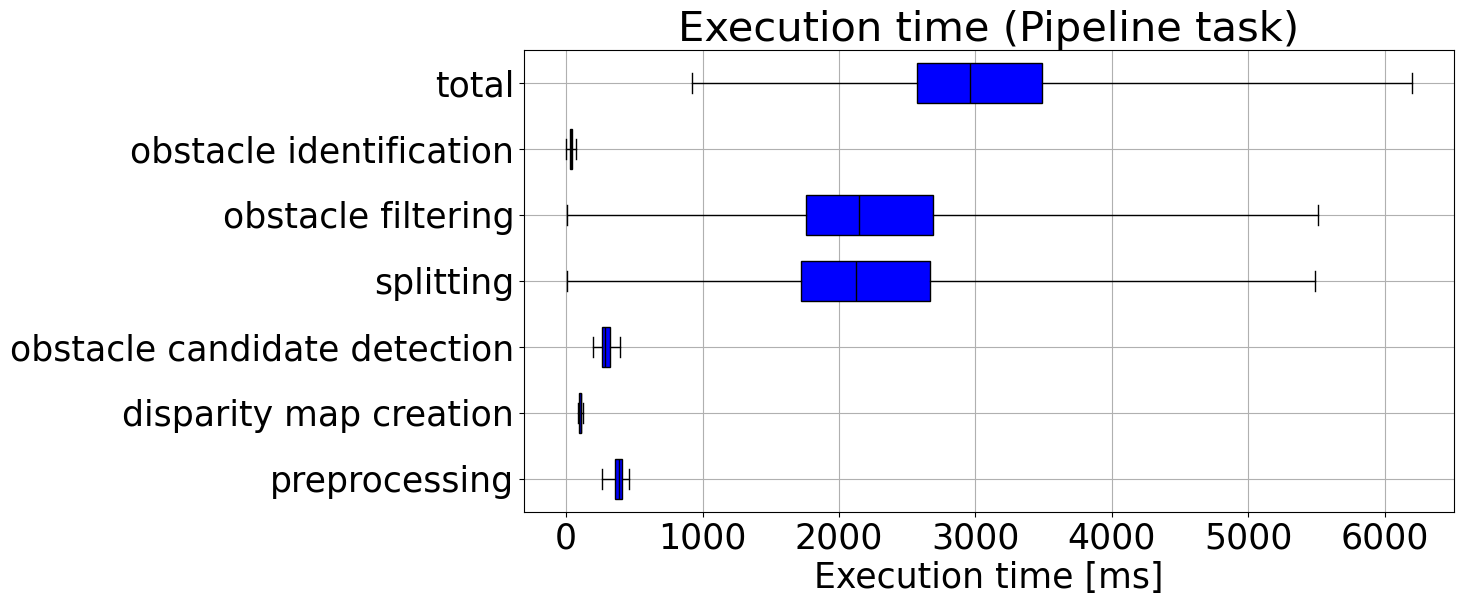

obstacle gap filling
Quantiles: 
[ 829.   981.  1183.5]



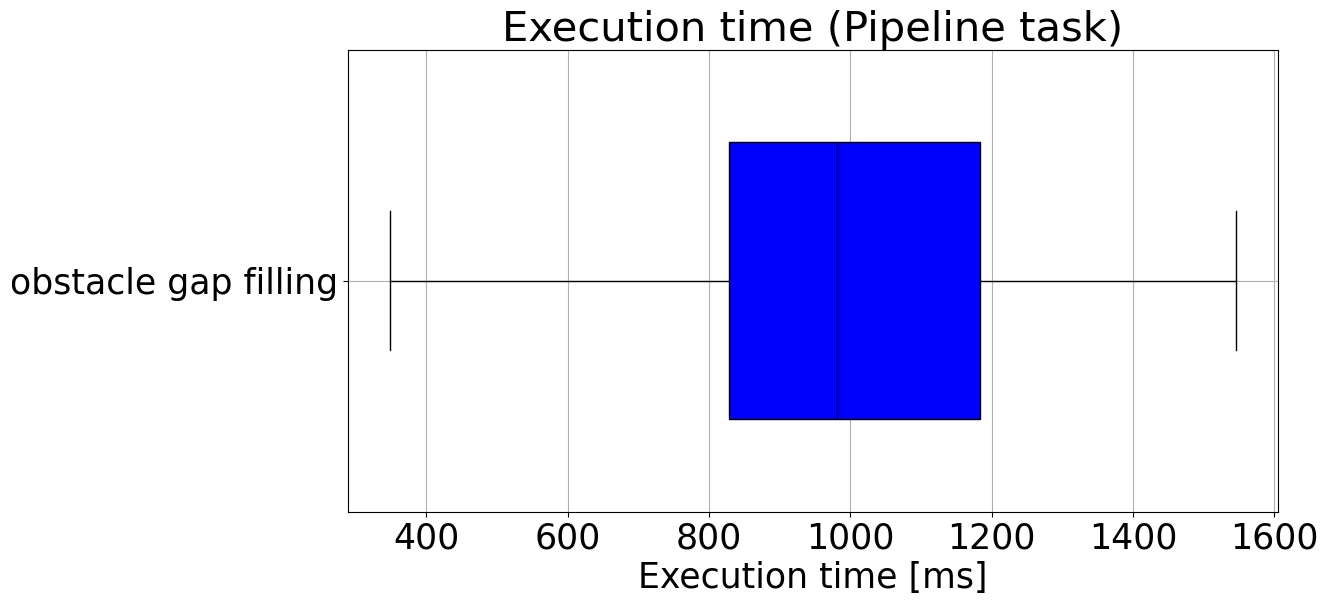

In [51]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import statistics
import seaborn as sns
import pandas as pd


# Show boxplots
colors = ['b']
environments = [""]
steps = ["preprocessing", "disparity map creation", "obstacle candidate detection", "splitting", "obstacle filtering", "obstacle identification", "total"]
time_data = [time_preprocess,time_disparity,time_candidate,time_splitting,time_filter,time_identify,time_total]
show_double_grouped_boxplots(environments,steps, [time_data], colors, '', 'Execution time [ms]','Execution time (Pipeline task)',True,"../../Data/Graphs/Final/step_execution_time.png")

new_values = []
for i in range(len(gap_fill)):
    if(gap_fill[i] == 1.0):
        new_values.append(time_gap_fix[i])


steps = ["obstacle gap filling"]
time_data = [new_values]
show_double_grouped_boxplots(environments,steps, [time_data], colors, '', 'Execution time [ms]','Execution time (Pipeline task)',True,"../../Data/Graphs/Final/patch_execution_time.png")


## Identification

In [53]:
percentages, names, comp_count, count = get_identification_results(correct_identify,false_positives,filter_bad,obstacle_count)
show_percentage_idenitfication(percentages,names,comp_count,count)

Total identified: 27.96208530805687% -> 59.0 of 211.0
Valid identified: 24.761904761904763% -> 26.0 of 105.0
Total false positive: 9.004739336492891% -> 19.0 of 211.0
Valid false positives: 6.666666666666667% -> 7.0 of 105.0


## Obstacles

In [57]:
percentages, names, comp_count, count, error_diff, error_valid_diff = get_obstacle_results(obstacle_count,correct_obstacle_count,candidate_bad)
show_percentage_obstacles(percentages,names,comp_count,count)

Obstacles found: 84.73895582329317% -> 211.0 of 249.0
Frames with correct amount of obstacles: 44.70588235294118% -> 38 of 85
Obstacles found in valid frames: 92.13973799126637% -> 211.0 of 229.0
Valid frames with correct amount of obstacles: 48.717948717948715% -> 38 of 78
Overcut: 12.941176470588237% -> 11 of 85
Undercut: 42.35294117647059% -> 36 of 85
Valid overcut: 14.102564102564102% -> 11 of 78
Valid undercut: 37.17948717948718% -> 29 of 78


All frames
Quantiles: 
[0. 0. 1.]

Valid frames
Quantiles: 
[0. 0. 1.]



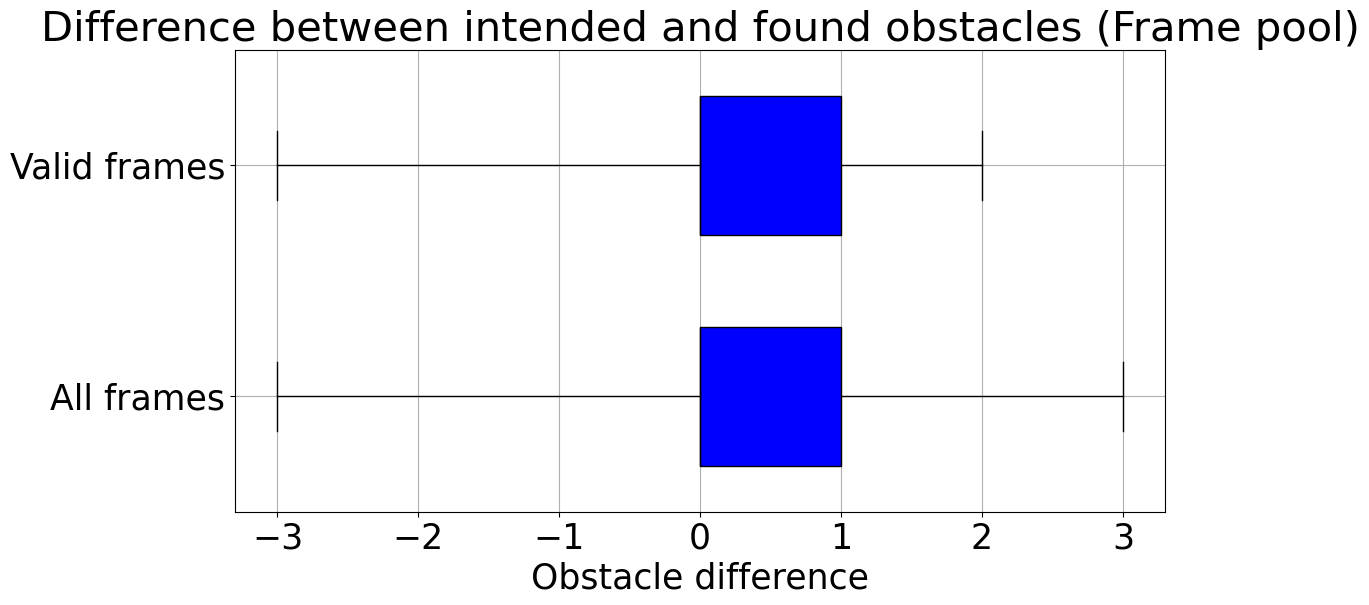

In [59]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import statistics
import seaborn as sns
import pandas as pd


# Show boxplots
colors = ['b']
environments = [""]
steps = ["All frames", "Valid frames"]
data = [error_diff, error_valid_diff]
show_double_grouped_boxplots(environments,steps, [data], colors, '', 'Obstacle difference','Difference between intended and found obstacles (Frame pool)',True,"../../Data/Graphs/Final/Difference_distribution.png")

## Rectification, gap and shift 

In [62]:
percentages, names, comp_count, count, error_diff, error_valid_diff = get_rectify_gap_shift_results(rectify_fix, gap_fill, correct_gap_fill, rectify_fix_better, shifted,filter_bad, obstacle_count)
show_percentage_obstacles(percentages,names,comp_count,count)

Shifted obstacles: 44.54976303317535% -> 94.0 of 211.0
Shifted valid obstacles: 40.0% -> 42.0 of 105.0
Good rectify fix: 100.0% -> 6.0 of 6
Good gap fill: 38.46153846153847% -> 10.0 of 26
Valid good gap fill: 0.0% -> 0.0 of 4
